# Retrieving Daily Treasury Yield Curve Rates 
## from the U.S. Department of The Treasury

https://www.treasury.gov/resource-center/data-chart-center/digitalstrategy/pages/developer.aspx

In [1]:
import requests
import xmltodict
import csv
from datetime import datetime,date
import matplotlib.pyplot as plt

# Retrieving the data for a single day

In [2]:
url='http://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData'
filter = '?$filter=day(NEW_DATE) eq 20 and month(NEW_DATE) eq 9 and year(NEW_DATE) eq 2019'
res = requests.get(url+filter)

In [3]:
doc = xmltodict.parse(res.text)

The data is either a single record or an array of records under the tag `d=doc['feed']['entry']['content']['m:properties']`

In [5]:
d=doc['feed']['entry']['content']['m:properties']

Get the labels are

In [6]:
keys = [key for key in d.keys()][1:]
keys

['d:NEW_DATE',
 'd:BC_1MONTH',
 'd:BC_2MONTH',
 'd:BC_3MONTH',
 'd:BC_6MONTH',
 'd:BC_1YEAR',
 'd:BC_2YEAR',
 'd:BC_3YEAR',
 'd:BC_5YEAR',
 'd:BC_7YEAR',
 'd:BC_10YEAR',
 'd:BC_20YEAR',
 'd:BC_30YEAR',
 'd:BC_30YEARDISPLAY']

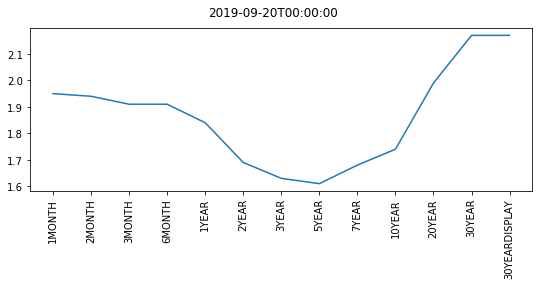

In [7]:
data =[(k.split('_')[1],float(d[k]['#text'])) for k in keys[1:]]
names = [d[0] for d in data]
values = [d[1] for d in data]

fig, ax = plt.subplots(figsize=(9, 3), sharey=True)
ax.plot(names, values)
fig.suptitle('2019-09-20T00:00:00')
ax.tick_params(axis='x', rotation=90)

# Retrieving the complete history

In [8]:
url ='http://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData'
res = requests.get(url)

In [9]:
doc = xmltodict.parse(res.text)

In [11]:
res=[]
for d in doc['feed']['entry']:
       res.append([d['content']['m:properties'][k]['#text'] if '#text' in d['content']['m:properties'][k].keys() else None
         for k in keys])
res = sorted(res)        

Saving the data to a csv file

In [44]:
with open('treasury.csv','w') as f:
    wr = csv.writer(f)
    wr.writerow([k.split(':')[1] for k in keys])
    for r in res:
        wr.writerow(r)

Plotting the 6 month values

In [12]:
keys[4]

'd:BC_6MONTH'

In [15]:
data = [[date.fromisoformat(r[0].split('T')[0]),float(r[4]) if r[4]!=None else None] for r in res]
x = [d[0] for d in data]
y = [d[1] for d in data]

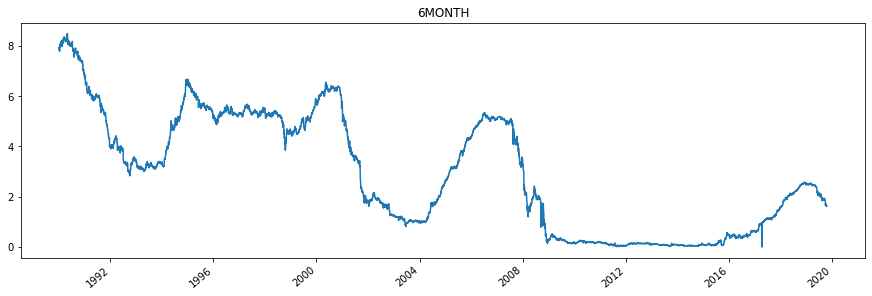

In [17]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 4))
ax.plot(x, y)
# rotate_labels...
for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
ax.set_title(keys[4].split('_')[1])
plt.show()